# Authors : 
# Michael KAHLA- Hongdu WEI - Antoine Lebrun

# Question 1 - Feature selection and data preprocessing : 

- Remove categorical variables
- Replace NAs by mean
- Feature selection using the correlation with the output technique

In [2]:
## Importing the libraries for the models : 
# 1 - Decision tree
# 2 - Random forest
# 3 - Neural network
library("tree")
library("rpart")
library("randomForest")


Warning message:
"package 'tree' was built under R version 4.3.3"
Warning message:
"package 'rpart' was built under R version 4.3.3"
Warning message:
"package 'randomForest' was built under R version 4.3.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



In [1]:
# Importing the data and visualizing it

train_path <- "data/Train.csv"  
test_path <- "data/Test.csv"    

train_data <- read.csv(train_path)
test_data <- read.csv(test_path)


set.seed(2)

dim(test_data)
dim(train_data)


[1] 16136    77

[1] 30557    82

The number of features in the test and train datasets are not the same, we need to be coherent and have the same number of columns in the two datasets in order to do the predictions

# First, let's remove categorical variables

Indeed, we need to do statistics on our variables, one way to do that is to remove the categorical features, so that all remains numerical. Another way, is to one hot encode the cattegoriacal variables, but here, we just removed them. We could use one hot encoding for further elaboration of this project in the future.

In [2]:
factor_variablesTrainSet<-which(sapply(train_data[1,],class)=="factor")
factor_variablesTrainSet

factor_VariablesTestSet<-which(sapply(test_data[1,],class)=="factor")
factor_VariablesTestSet

named integer(0)

named integer(0)

We don't have factor variables types in neither the train nor the test set. Let's see if we have variables with types "chr", and how many of them

In [3]:
is_categoricalTrainSet<-which(sapply(train_data[1,],class)=="character")
is_categoricalTrainSet

is_categoricalTestSet<-which(sapply(test_data[1,],class)=="character")
is_categoricalTrainSet

Place_ID.X.Date            Date        Place_ID 
              1               2               3

Place_ID.X.Date            Date        Place_ID 
              1               2               3

As it suggest, we have categorical variables of type "character" in both datasets, so we need to remove them in order to make our statistics

In [4]:
training_preprocessed<-train_data[,-is_categoricalTrainSet]
testing_preprocessed<-test_data[,-is_categoricalTestSet]

cat("Training dimension", dim(training_preprocessed))

cat("\nTesting dimension" , dim(testing_preprocessed))

if(identical(names(training_preprocessed), names(testing_preprocessed))==FALSE)
{
    cat("\n The two sets don't have the same features")
}
head(training_preprocessed)
head(testing_preprocessed)

Training dimension 30557 79


Testing dimension 16136 74
 The two sets don't have the same features

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,38,23,53,769.50,92,11.000000,60.2,0.00804000,18.51684,1.996377,⋯,38.5930174,-61.75259,22.36366,1793.794,3227.855,0.01057904,74.48105,37.50150,-62.14264,22.54512
2,39,25,63,1319.85,91,14.600000,48.8,0.00839000,22.54653,3.330430,⋯,59.6249116,-67.69351,28.61480,1789.960,3384.227,0.01510438,75.63004,55.65749,-53.86813,19.29365
3,24,8,56,1181.96,96,16.400000,33.4,0.00750000,27.03103,5.065727,⋯,49.8397137,-78.34270,34.29698,NA,NA,NA,NA,NA,NA,NA
4,49,10,55,1113.67,96,6.911948,21.3,0.00391000,23.97186,3.004001,⋯,29.1812580,-73.89659,30.54545,NA,NA,NA,NA,NA,NA,NA
5,21,9,52,1164.82,95,13.900001,44.7,0.00535000,16.81631,2.621787,⋯,0.7972941,-68.61248,26.89969,NA,NA,NA,NA,NA,NA,NA
6,28,10,52,1053.22,94,14.600000,42.2,0.00586156,19.17489,2.955603,⋯,30.6051757,-62.13426,23.41999,NA,NA,NA,NA,NA,NA,NA


,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,11.60000,30.2,0.00409000,14.65682,3.956377,0.7126049,5.338188e-05,0.0001081872,0.4661706,0.01075178,⋯,1.445658,-95.98498,22.94202,NA,NA,NA,NA,NA,NA,NA
2,18.30000,42.9,0.00595000,15.02654,4.230430,0.6618921,5.044761e-05,0.0001090962,-0.2136590,0.02830689,⋯,34.641758,-95.01491,18.53912,NA,NA,NA,NA,NA,NA,NA
3,17.60000,41.3,0.00590000,15.51104,5.245728,1.6405591,5.035383e-05,0.0001344593,-0.2542505,0.01037382,⋯,55.872276,-94.01542,14.14082,NA,NA,NA,NA,NA,NA,NA
4,15.01195,53.1,0.00709000,14.44186,5.454001,-0.1905322,5.499153e-05,0.0001546277,-0.2684903,0.08879496,⋯,59.174188,-97.24760,32.73055,NA,NA,NA,NA,NA,NA,NA
5,9.70000,71.6,0.00808000,11.89630,3.511787,-0.2794409,5.508028e-05,0.0001308539,0.4607204,0.04119687,⋯,40.925873,-96.05727,28.32053,1831.262,3229.119,0.03106805,-100.27834,41.84708,-95.91074,28.49879
6,13.40000,69.3,0.00828156,12.74487,3.945603,-0.2409253,5.809714e-05,0.0001141703,0.8438090,0.02319110,⋯,10.836973,-94.79964,23.90786,1837.775,2994.671,0.02152895,-97.42958,11.77791,-94.48296,24.03635


As we can see, the 3 categorical columns of our datasets were removed, and we are left with numerical variables. But we have still one problem : in order to be coherent, we need to have the same amount of columns in the train dataset and in the test dataset. As we can see with the "dim()" function, that is not the case (We have 79 columns) in our training dataset, and 74 in our testing. That's because we have 4 features ("target_min", "target_max", "target_variance", and "target_count", which are not present in our testing set. The 5th column which is not present is the "target", but we'll define it later when we'll define our inputs and outputs)

In [5]:
# Remove the useless variables
training<-training_preprocessed[,setdiff(colnames(training_preprocessed), c("target_min", "target_max", "target_variance", "target_count"))]
testing<-testing_preprocessed

dim(training)
dim(testing)
head(training)
head(testing)

[1] 30557    75

[1] 16136    74

,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,38,11.000000,60.2,0.00804000,18.51684,1.996377,-1.2273949,7.383038e-05,0.0001558203,-1.2313303,⋯,38.5930174,-61.75259,22.36366,1793.794,3227.855,0.01057904,74.48105,37.50150,-62.14264,22.54512
2,39,14.600000,48.8,0.00839000,22.54653,3.330430,-1.1881078,7.603261e-05,0.0001968663,-1.0825535,⋯,59.6249116,-67.69351,28.61480,1789.960,3384.227,0.01510438,75.63004,55.65749,-53.86813,19.29365
3,24,16.400000,33.4,0.00750000,27.03103,5.065727,3.5005591,6.660776e-05,0.0001704180,-1.0012421,⋯,49.8397137,-78.34270,34.29698,NA,NA,NA,NA,NA,NA,NA
4,49,6.911948,21.3,0.00391000,23.97186,3.004001,1.0994678,8.258178e-05,0.0001748593,-0.7770191,⋯,29.1812580,-73.89659,30.54545,NA,NA,NA,NA,NA,NA,NA
5,21,13.900001,44.7,0.00535000,16.81631,2.621787,2.6705589,7.038484e-05,0.0001415511,0.3663234,⋯,0.7972941,-68.61248,26.89969,NA,NA,NA,NA,NA,NA,NA
6,28,14.600000,42.2,0.00586156,19.17489,2.955603,0.9690747,6.866629e-05,0.0001455166,-0.7253287,⋯,30.6051757,-62.13426,23.41999,NA,NA,NA,NA,NA,NA,NA


,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,11.60000,30.2,0.00409000,14.65682,3.956377,0.7126049,5.338188e-05,0.0001081872,0.4661706,0.01075178,⋯,1.445658,-95.98498,22.94202,NA,NA,NA,NA,NA,NA,NA
2,18.30000,42.9,0.00595000,15.02654,4.230430,0.6618921,5.044761e-05,0.0001090962,-0.2136590,0.02830689,⋯,34.641758,-95.01491,18.53912,NA,NA,NA,NA,NA,NA,NA
3,17.60000,41.3,0.00590000,15.51104,5.245728,1.6405591,5.035383e-05,0.0001344593,-0.2542505,0.01037382,⋯,55.872276,-94.01542,14.14082,NA,NA,NA,NA,NA,NA,NA
4,15.01195,53.1,0.00709000,14.44186,5.454001,-0.1905322,5.499153e-05,0.0001546277,-0.2684903,0.08879496,⋯,59.174188,-97.24760,32.73055,NA,NA,NA,NA,NA,NA,NA
5,9.70000,71.6,0.00808000,11.89630,3.511787,-0.2794409,5.508028e-05,0.0001308539,0.4607204,0.04119687,⋯,40.925873,-96.05727,28.32053,1831.262,3229.119,0.03106805,-100.27834,41.84708,-95.91074,28.49879
6,13.40000,69.3,0.00828156,12.74487,3.945603,-0.2409253,5.809714e-05,0.0001141703,0.8438090,0.02319110,⋯,10.836973,-94.79964,23.90786,1837.775,2994.671,0.02152895,-97.42958,11.77791,-94.48296,24.03635


Okay now we can see that it worked, but our target variable remained in the training set, but we'll deal with it later

# 2 - Now let's see if we have missing values

In [6]:
cat("We have", sum(is.na(training)), "NA in the training\n")
cat("We have", sum(is.na(testing)), "NA in the testing")

We have 388262 NA in the training


We have 215137 NA in the testing

We have too much NA, we cannot just remove the lines where we meet them, we will loose too much informations. Instead, we will replace them with the mean values of the columns. 

In [7]:
replace_na_with_mean_value <- function(vec) {
    mean_vec <- mean(vec, na.rm = TRUE)
    vec[is.na(vec)] <- mean_vec
  return(vec)
}

trainDataset <- data.frame(lapply(training, replace_na_with_mean_value))
testDataset <- data.frame(lapply(testing, replace_na_with_mean_value))

cat("We had", sum(is.na(training)), "NA in the train data. Now we have", sum(is.na(trainDataset)), "NA, and its dimension is :", dim(trainDataset)[1], "X", dim(trainDataset)[2])
cat("\nWe had", sum(is.na(testing)), "NA in the test data. Now we have", sum(is.na(testDataset)), "NA, and its dimension is :",  dim(testDataset)[1], "X", dim(testDataset)[2])

We had 388262 NA in the train data. Now we have 0 NA, and its dimension is : 30557 X 75
We had 215137 NA in the test data. Now we have 0 NA, and its dimension is : 16136 X 74

Now that our datasets are preprocessed, we will initialize our inputs and outputs as we discussed first.

The output is the target, and the inputs are the other columns. So let's define it

In [8]:
options(repr.plot.width=20, repr.plot.height=10)
set.seed(3)

X_train<-trainDataset[,setdiff(colnames(trainDataset),"target")]
Y_train<-trainDataset[,"target"] # This is our output
X_test<-testDataset        # We don't have target column in test dataset

N_train<-nrow(X_train)    #Number of example in train set
n_train<-ncol(X_train)    #Number of input variables in train set

N_test<-nrow(X_test)    #Number of examples in test set
n_test<-ncol(X_test)    #Number of input variables in test set

length(Y_train)

dim(X_train)

[1] 30557

[1] 30557    74

In [9]:
head(trainDataset)
head(X_train)
head(testDataset)

,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,38,11.000000,60.2,0.00804000,18.51684,1.996377,-1.2273949,7.383038e-05,0.0001558203,-1.2313303,⋯,38.5930174,-61.75259,22.36366,1793.7936,3227.855,0.01057904,74.481049,37.50150,-62.14264,22.54512
2,39,14.600000,48.8,0.00839000,22.54653,3.330430,-1.1881078,7.603261e-05,0.0001968663,-1.0825535,⋯,59.6249116,-67.69351,28.61480,1789.9604,3384.227,0.01510438,75.630043,55.65749,-53.86813,19.29365
3,24,16.400000,33.4,0.00750000,27.03103,5.065727,3.5005591,6.660776e-05,0.0001704180,-1.0012421,⋯,49.8397137,-78.34270,34.29698,923.2319,1711.794,0.01622666,1.254703,13.84904,-69.09859,23.10063
4,49,6.911948,21.3,0.00391000,23.97186,3.004001,1.0994678,8.258178e-05,0.0001748593,-0.7770191,⋯,29.1812580,-73.89659,30.54545,923.2319,1711.794,0.01622666,1.254703,13.84904,-69.09859,23.10063
5,21,13.900001,44.7,0.00535000,16.81631,2.621787,2.6705589,7.038484e-05,0.0001415511,0.3663234,⋯,0.7972941,-68.61248,26.89969,923.2319,1711.794,0.01622666,1.254703,13.84904,-69.09859,23.10063
6,28,14.600000,42.2,0.00586156,19.17489,2.955603,0.9690747,6.866629e-05,0.0001455166,-0.7253287,⋯,30.6051757,-62.13426,23.41999,923.2319,1711.794,0.01622666,1.254703,13.84904,-69.09859,23.10063


,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,11.000000,60.2,0.00804000,18.51684,1.996377,-1.2273949,7.383038e-05,0.0001558203,-1.2313303,0.006506796,⋯,38.5930174,-61.75259,22.36366,1793.7936,3227.855,0.01057904,74.481049,37.50150,-62.14264,22.54512
2,14.600000,48.8,0.00839000,22.54653,3.330430,-1.1881078,7.603261e-05,0.0001968663,-1.0825535,0.018360030,⋯,59.6249116,-67.69351,28.61480,1789.9604,3384.227,0.01510438,75.630043,55.65749,-53.86813,19.29365
3,16.400000,33.4,0.00750000,27.03103,5.065727,3.5005591,6.660776e-05,0.0001704180,-1.0012421,0.015903901,⋯,49.8397137,-78.34270,34.29698,923.2319,1711.794,0.01622666,1.254703,13.84904,-69.09859,23.10063
4,6.911948,21.3,0.00391000,23.97186,3.004001,1.0994678,8.258178e-05,0.0001748593,-0.7770191,0.055765467,⋯,29.1812580,-73.89659,30.54545,923.2319,1711.794,0.01622666,1.254703,13.84904,-69.09859,23.10063
5,13.900001,44.7,0.00535000,16.81631,2.621787,2.6705589,7.038484e-05,0.0001415511,0.3663234,0.028529577,⋯,0.7972941,-68.61248,26.89969,923.2319,1711.794,0.01622666,1.254703,13.84904,-69.09859,23.10063
6,14.600000,42.2,0.00586156,19.17489,2.955603,0.9690747,6.866629e-05,0.0001455166,-0.7253287,0.070249175,⋯,30.6051757,-62.13426,23.41999,923.2319,1711.794,0.01622666,1.254703,13.84904,-69.09859,23.10063


,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,L3_NO2_cloud_fraction,⋯,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,11.60000,30.2,0.00409000,14.65682,3.956377,0.7126049,5.338188e-05,0.0001081872,0.4661706,0.01075178,⋯,1.445658,-95.98498,22.94202,945.231,1766.062,0.01812192,0.5874307,14.05384,-71.28798,24.11399
2,18.30000,42.9,0.00595000,15.02654,4.230430,0.6618921,5.044761e-05,0.0001090962,-0.2136590,0.02830689,⋯,34.641758,-95.01491,18.53912,945.231,1766.062,0.01812192,0.5874307,14.05384,-71.28798,24.11399
3,17.60000,41.3,0.00590000,15.51104,5.245728,1.6405591,5.035383e-05,0.0001344593,-0.2542505,0.01037382,⋯,55.872276,-94.01542,14.14082,945.231,1766.062,0.01812192,0.5874307,14.05384,-71.28798,24.11399
4,15.01195,53.1,0.00709000,14.44186,5.454001,-0.1905322,5.499153e-05,0.0001546277,-0.2684903,0.08879496,⋯,59.174188,-97.24760,32.73055,945.231,1766.062,0.01812192,0.5874307,14.05384,-71.28798,24.11399
5,9.70000,71.6,0.00808000,11.89630,3.511787,-0.2794409,5.508028e-05,0.0001308539,0.4607204,0.04119687,⋯,40.925873,-96.05727,28.32053,1831.262,3229.119,0.03106805,-100.2783432,41.84708,-95.91074,28.49879
6,13.40000,69.3,0.00828156,12.74487,3.945603,-0.2409253,5.809714e-05,0.0001141703,0.8438090,0.02319110,⋯,10.836973,-94.79964,23.90786,1837.775,2994.671,0.02152895,-97.4295780,11.77791,-94.48296,24.03635


# 3 - Feature selection :

"Complex models usually have a high variance, sensitive to changes in training data and are prone to overfitting. On the other hand simpler models have high bias and are likely to fail in predicting complex real world phenomena. So it is quite important to strike a balance between bias & variance by selecting the right complexity for the model. One of the metric for determining the model complexity is the no of features used for building the model and selecting the right no of features is therefore crucial" : 
https://gijopeter.medium.com/cross-validation-for-ml-feature-selection-ffdb71e5a68f 

We will use feature selection by using the filter methods for their rapidity, instead of the wrapper methods based on the performances of a model. 
We will use two algorithms : 
- The correlation based method
- The mRmR method

The code below computes the correlation of each feature with the output target and sorts them in decreasing order of correlation. Then, it uses cross-validation to evaluate the performance of the model (here a linear regression) depending on the number of features used. It begins with a single feature (the most correlated one) and adds the rest step by step based on the ranking. This shows us how the performance of our model evolves as we add more variables.

The goal here is to make a trade-off between the number of variables (not too much because we want an efficient model at the end which generalizes well, avoiding overfitting) and its performance. 

For each number of features, we evaluate the RMSE, allowing us to determine the optimal number of features that minimizes the error. This helps to identify the point at which adding more features no longer improves the model and may even degrade its performance due to overfitting.

# But what is the advantage of cross validation in feature selection ?

By proceeding without cross-validation, we risk selecting features that only appear to perform well for that specific training dataset. The selected features may not generalize well to new data, leading to a model that overfits, and that have poor generalizing to new data. However, with cross-validation, we will create multiple validation sets to ensure our model generalizes well. 

In [10]:
CV_folds <- 10 # Number of folds for cross validation

size_CV <-floor(N_train/CV_folds) # Size of each folds 

CV_errCorrelationMethod<-matrix(0,nrow=n_train,ncol=CV_folds) # Validation error for each features, and for each fold

## Loop of cross validation

for (i in 1:CV_folds) {
    
    idx_ts<-(((i-1)*size_CV+1):(i*size_CV))  ### idx_ts represents the indices of the test set the i-th fold
    X_ts<-X_train[idx_ts,]  
    Y_ts<-Y_train[idx_ts]  
     
    idx_tr<-setdiff(1:N_train,idx_ts) ### idx_tr represents  indices of the training sefor the i-th fold
    X_tr<-X_train[idx_tr,]
    Y_tr<-Y_train[idx_tr]                          
    
    # Compute correlation across all the input variables and the target variable
    correlation_vector <-abs(cor(X_tr,Y_tr))
    
    # Rank variables according to correlation with the output
    correlation_ranking_idx <-sort(correlation_vector,dec=T,index.return=T)$ix
     
    for (nb_features in 1:n_train) { 
        # Create a dataset including only the nb_features most correlated variables with the output
        DS<-cbind(X_tr[,correlation_ranking_idx[1:nb_features],drop=F],target=Y_tr)
        
        # Model fit (using linear model)
        model<- lm(target~.,DS)
        
        # Model prediction
        Y_hat_ts<- predict(model,X_ts[,correlation_ranking_idx[1:nb_features],drop=F])
        
        # Cross validation error = MSE
        CV_errCorrelationMethod[nb_features,i] <- sqrt(mean((Y_hat_ts-Y_ts)^2))
    }
}  

print(paste("#Features: ",c(1:n_train)," ; RMSE=",round(apply(CV_errCorrelationMethod,1,mean),digits=4), " ; std dev=",round(apply(CV_errCorrelationMethod,1,sd),digits=4)))

 [1] "#Features:  1  ; RMSE= 43.8692  ; std dev= 5.3491" 
 [2] "#Features:  2  ; RMSE= 43.4199  ; std dev= 5.3215" 
 [3] "#Features:  3  ; RMSE= 42.3469  ; std dev= 5.2826" 
 [4] "#Features:  4  ; RMSE= 40.7321  ; std dev= 5.6295" 
 [5] "#Features:  5  ; RMSE= 40.3653  ; std dev= 5.3842" 
 [6] "#Features:  6  ; RMSE= 40.3459  ; std dev= 5.3871" 
 [7] "#Features:  7  ; RMSE= 40.1469  ; std dev= 5.1678" 
 [8] "#Features:  8  ; RMSE= 40.1243  ; std dev= 5.173"  
 [9] "#Features:  9  ; RMSE= 40.1266  ; std dev= 5.1745" 
[10] "#Features:  10  ; RMSE= 39.8625  ; std dev= 5.2233"
[11] "#Features:  11  ; RMSE= 39.8241  ; std dev= 5.2888"
[12] "#Features:  12  ; RMSE= 39.825  ; std dev= 5.2851" 
[13] "#Features:  13  ; RMSE= 39.8236  ; std dev= 5.2862"
[14] "#Features:  14  ; RMSE= 39.7373  ; std dev= 5.3027"
[15] "#Features:  15  ; RMSE= 39.6725  ; std dev= 5.3617"
[16] "#Features:  16  ; RMSE= 39.4071  ; std dev= 5.3496"
[17] "#Features:  17  ; RMSE= 39.403  ; std dev= 5.3749" 
[18] "#Feature

We can see that the error decreases as the number of features increases, but let's try to do better, as our goal is to find a trade-off between the performance of the model and the number of variables.

With this simple algorithm, the most correlated variables are selected first, without taking into account the redundancy. This approach has some limitations and benefits compared to more sophisticated methods like MRMR (Minimum Redundancy Maximum Relevance).

- Correlation-based selection is simple and easy to implement. It is computationally quick because it only considers the correlation of each feature with the target variable. However, this method does not account for redundancy between features, which can lead to less efficient models. Additionally, it only captures linear relationships and may miss non-linear patterns.


- MRMR selects features by maximizing relevance with the target variable while minimizing redundancy among the selected features. This ensures that each selected feature provides unique information, reducing redundancy. As a result, MRMR helps models generalize better to new data and reduces the risk of overfitting. MRMR can also capture more complex, non-linear relationships between features and the target variable. Thus, with MRMR, if two features are similar, or highly correlated, only the more relevant one will be considered important.

# mRmR

The code below implement a feature selection with the mRmR technique (Minimum Redundancy Maximum Relevance) and uses cross validation in order to evaluate the performance of the model based on the number of features used. 

In [11]:
CV_folds <- 10

size_CV <- floor(N_train / CV_folds)

CV_errmRmR <- matrix(0, nrow = n_train, ncol = CV_folds)

for (i in 1:CV_folds) 
{
    
    idx_ts <- (((i - 1) * size_CV + 1):(i * size_CV))  ### idx_ts represents the indices of the test set the i-th fold 
    X_ts <- X_train[idx_ts,]  
    Y_ts <- Y_train[idx_ts]  
    
    idx_tr <- setdiff(1:N_train, idx_ts) ### idx_tr represents the indices of the training set for the i-th fold
    X_tr <- X_train[idx_tr,]
    Y_tr <- Y_train[idx_tr]                          
    
    # Computing the mutual_info between input variables and output variable on the training set
    mutual_info <- -0.5 * log(1 - cor(X_tr, Y_tr)^2)
    
    # Initialization : No variables are selected and all the variables are candidates
    selected <- c()
    candidates <- 1:n_train
    
    # mRMR ranks the variables by taking account not only the mutual_info with the output, but also by avoiding redundant variables
    for (j in 1:n_train) {
        redundancy_score <- numeric(length(candidates))
        
        if (length(selected) > 0) {
            # Compute the mutual_info between the selected variables and the candidates on the training set
            mutual_info_selected_candidates <- -0.5 * log(1 - cor(X_tr[, selected, drop = F], X_tr[, candidates, drop = F])^2)
            # Compute the mean mutual_info for each candidate variable, across the selected variables
            redundancy_score <- apply(mutual_info_selected_candidates, 2, mean)
        }
        
        # mRMR: minimum Redundancy Maximum Relevancy
        mRMR_score <- mutual_info[candidates] - redundancy_score
        
        # Select the candidate variable that maximises the mRMR score
        selected_current <- candidates[which.max(mRMR_score)]
        selected <- c(selected, selected_current)
        
        # Remove the selected variables from the candidates
        candidates <- setdiff(candidates, selected_current)
    }
    
    ranking <- selected
    
    for (nb_features in 1:n_train) {
        # Create a dataset including only the first nb_features selected variables
        DS <- cbind(X_tr[, ranking[1:nb_features], drop = F], target = Y_tr)
        
        # Model fit (using lm function)
        model <- lm(target ~ ., DS)
        
        # Model prediction
        Y_hat_ts <- predict(model, X_ts[, ranking[1:nb_features], drop = F])
        
        # Cross-validation error = MSE
        CV_errmRmR[nb_features, i] <- sqrt(mean((Y_hat_ts - Y_ts)^2))
    
    }
}  

print(paste("#Features: ", c(1:n_train), " ; CV error=", round(apply(CV_errmRmR, 1, mean), digits = 4), " ; std dev=", round(apply(CV_errmRmR, 1, sd), digits = 4)))

 [1] "#Features:  1  ; CV error= 43.8692  ; std dev= 5.3491" 
 [2] "#Features:  2  ; CV error= 42.8139  ; std dev= 5.6282" 
 [3] "#Features:  3  ; CV error= 41.5264  ; std dev= 5.3779" 
 [4] "#Features:  4  ; CV error= 40.6459  ; std dev= 5.1544" 
 [5] "#Features:  5  ; CV error= 40.2417  ; std dev= 5.2329" 
 [6] "#Features:  6  ; CV error= 40.1188  ; std dev= 5.2597" 
 [7] "#Features:  7  ; CV error= 39.9419  ; std dev= 5.3146" 
 [8] "#Features:  8  ; CV error= 39.8965  ; std dev= 5.3251" 
 [9] "#Features:  9  ; CV error= 39.8446  ; std dev= 5.3966" 
[10] "#Features:  10  ; CV error= 39.8364  ; std dev= 5.3756"
[11] "#Features:  11  ; CV error= 39.8684  ; std dev= 5.4059"
[12] "#Features:  12  ; CV error= 39.8248  ; std dev= 5.3938"
[13] "#Features:  13  ; CV error= 39.7748  ; std dev= 5.418" 
[14] "#Features:  14  ; CV error= 39.6256  ; std dev= 5.4643"
[15] "#Features:  15  ; CV error= 39.549  ; std dev= 5.436"  
[16] "#Features:  16  ; CV error= 39.6224  ; std dev= 5.3813"
[17] "#F

Let's compare the ranking of the variables for each algorithms, as well as the graph representing the error based on the number of features

In [12]:
install.packages("tidyverse")

library(tidyverse)

Installing package into 'C:/Users/micha/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\micha\AppData\Local\Temp\RtmpIVpl0r\downloaded_packages


Warning message:
"package 'tidyverse' was built under R version 4.3.3"
Warning message:
"package 'ggplot2' was built under R version 4.3.3"
Warning message:
"package 'tibble' was built under R version 4.3.3"
Warning message:
"package 'tidyr' was built under R version 4.3.3"
Warning message:
"package 'readr' was built under R version 4.3.3"
Warning message:
"package 'dplyr' was built under R version 4.3.3"
Warning message:
"package 'forcats' was built under R version 4.3.3"
Warning message:
"package 'lubridate' was built under R version 4.3.3"
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package 

Warning message:
"package 'pracma' was built under R version 4.3.3"



Attaching package: 'pracma'


The following object is masked from 'package:purrr':

    cross




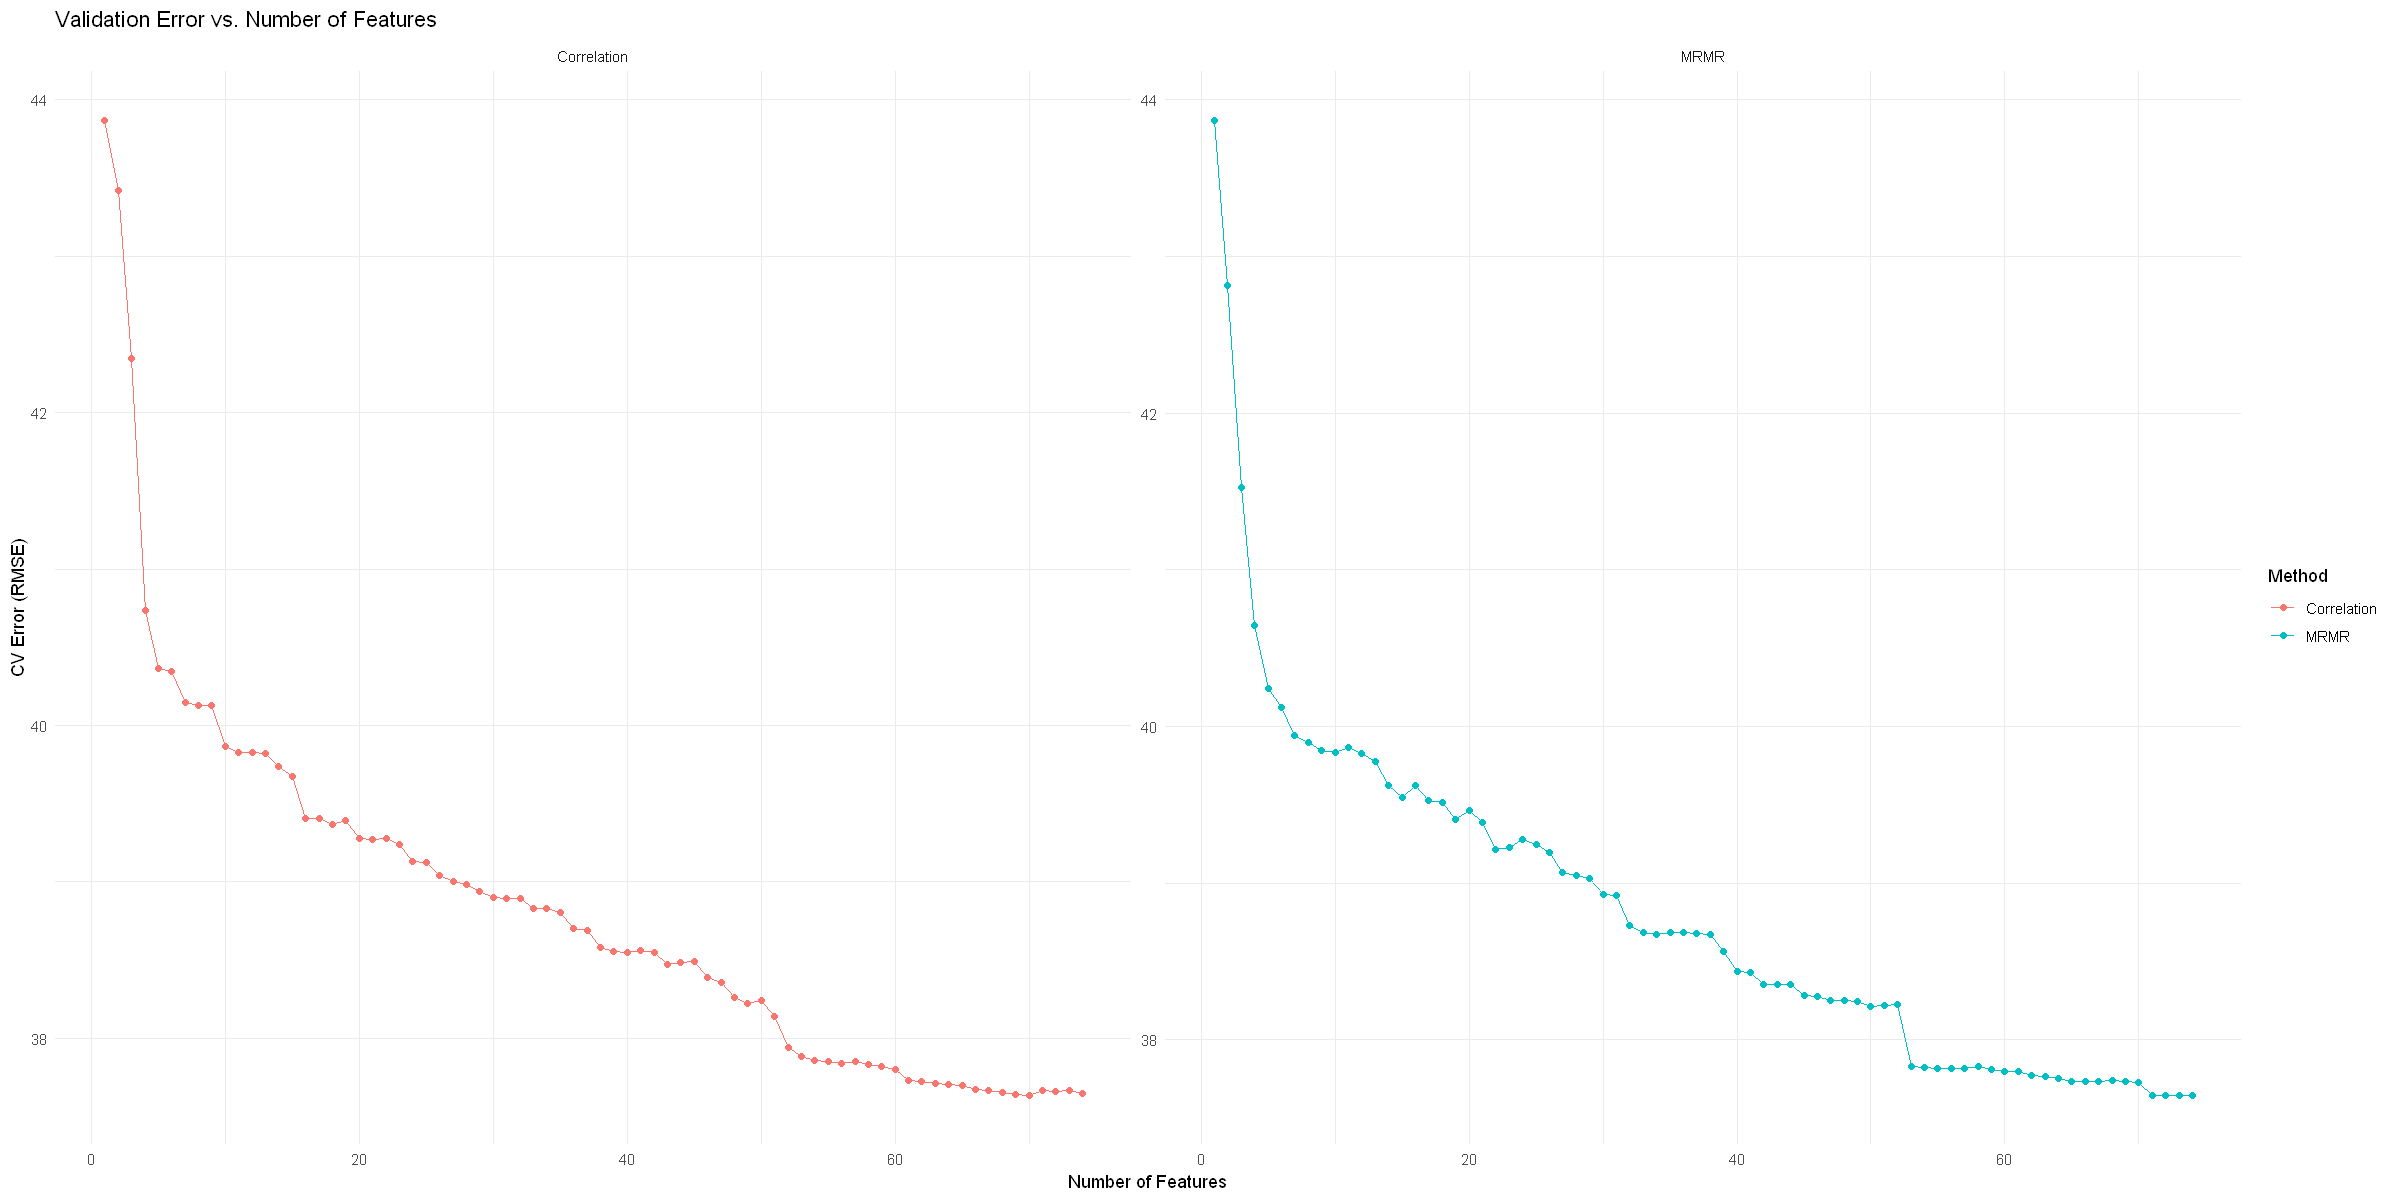

In [13]:
library(ggplot2)
library(pracma)

x <- 1:n_train

y_corr <- apply(CV_errCorrelationMethod, 1, mean)

y_mrmr <- apply(CV_errmRmR, 1, mean)

results <- data.frame(
  Number_of_Features = rep(x, 2),
  CV_Error = c(y_corr, y_mrmr),
  Method = rep(c("Correlation", "MRMR"), each = n_train)
)

ggplot(results) +
  geom_point(aes(x = Number_of_Features, y = CV_Error, color = Method)) +
  geom_line(aes(x = Number_of_Features, y = CV_Error, color = Method)) +
  labs(title = "Validation Error vs. Number of Features",
       x = "Number of Features",
       y = "CV Error (RMSE)") +
  facet_wrap(~ Method, scales = "free") +
  theme_minimal()


Although the differences between these two graph are not very high, we would take mRmR thanks to its ability to minimize the redundances between variables. We can see that the validation error (RMSE) decreases significantly as the number of features increases up to around 30. By choosing a threshold of 30 features, we balance model complexity and performance, ensuring the model remains efficient and avoids overfitting. This threshold helps in maintaining a simpler, more generalizable model that performs well on new, unseen data.

In [14]:
cat("Ranking  of features with the correlation based algorithm :")
correlation_ranking_idx
cat("Ranking  of features with the mRmR algorithm :")
selected

Ranking  of features with the correlation based algorithm :

[1] 26 40 54  8 34  7 18 57 50 24 14 38 66  5 32 62 47 10 45 44 46 21 41 28 43
[26] 17 19 58 42 51  2 53 73 25 11 33 52 61 70  6 68 69 39 67 59 13 20  4  9 16
[51] 74 72  3 63  1 64 23 36 31 49 37 65 27 35 30 60 56 29 71 55 15 48 12 22

Ranking  of features with the mRmR algorithm :

[1] 26  8 40 54 62  5 45 59 47 70 71 57 41  7  6 10 12 19 31 34 52 72 28  2 66
[26] 16 27 18 53 73 60 35 32 58 61 29 36 14 13  1  9 20 44 74 17 30 42 38 37 67
[51] 11 63  4 24 55 56 69  3 33 21 64 15 23 43 50 65 68 39 22 25 46 51 49 48

In [15]:
# Putting a threshold using mRmR technique

optimal_threshold_mrmr <- 30

selected_mRmR <- selected[1:optimal_threshold_mrmr]

all_features <- 1:ncol(X_train)

features_to_remove <- setdiff(all_features, selected_mRmR)

cat("Indexes of selected features (MRMR):", selected_mRmR, "\n")
cat("Indexes of features to remove:", features_to_remove, "\n")

X_train_selected <- X_train[, selected_mRmR, drop = FALSE]
X_test_selected <- X_test[, selected_mRmR, drop = FALSE]

# Afficher les noms des caractéristiques sélectionnées pour vérifier
cat("Selected features in training set:", names(X_train_selected), "\n")
cat("Selected features in test set:", names(X_test_selected), "\n")

dim(X_train_selected) # We can see that we have our 30 best features
dim(X_test_selected)

Indexes of selected features (MRMR): 26 8 40 54 62 5 45 59 47 70 71 57 41 7 6 10 12 19 31 34 52 72 28 2 66 16 27 18 53 73 


Indexes of features to remove: 1 3 4 9 11 13 14 15 17 20 21 22 23 24 25 29 30 32 33 35 36 37 38 39 42 43 44 46 48 49 50 51 55 56 58 60 61 63 64 65 67 68 69 74 
Selected features in training set: L3_CO_CO_column_number_density L3_NO2_NO2_slant_column_number_density L3_HCHO_tropospheric_HCHO_column_number_density L3_AER_AI_sensor_altitude L3_SO2_absorbing_aerosol_index u_component_of_wind_10m_above_ground L3_CLOUD_cloud_optical_depth L3_SO2_SO2_column_number_density L3_CLOUD_cloud_top_pressure L3_CH4_aerosol_optical_depth L3_CH4_sensor_azimuth_angle L3_AER_AI_solar_azimuth_angle L3_HCHO_tropospheric_HCHO_column_number_density_amf L3_NO2_NO2_column_number_density v_component_of_wind_10m_above_ground L3_NO2_cloud_fraction L3_NO2_sensor_azimuth_angle L3_O3_O3_column_number_density L3_CO_sensor_zenith_angle L3_HCHO_HCHO_slant_column_number_density L3_CLOUD_surface_albedo L3_CH4_sensor_zenith_angle L3_CO_cloud_height relative_humidity_2m_above_ground L3_SO2_solar_azimuth_angle L3_NO2_stratosp

[1] 30557    30

[1] 16136    30

# Question 2 : 

For this question , we will implement three different models, in order to test their performance , and select the best one (The one minimizing the average errrors for each of our cross-validation folds.)
To have a more accurate measure of the generalization error, let's use validation techniques, cross validation for instance.

 Let's implement a function in order to do it, and call it for each of our models : 

for exercise 2 : 

 - Model 1 : Neural network
 
 - Model 2 : Decision tree
 
 - Model 3 : Random forest

For exercise 3 : 
    
- xGboost
    

In [16]:
dim(X_train_selected)

[1] 30557    30

# Cross validation for random forest and decision tree models

In [50]:
library(rpart)
library(randomForest)

perform_cv <- function(X_train, Y_train, model_func, pred_type, ...) {
    CV_folds <- 10
    N_train <- nrow(X_train)
    size_CV <- floor(N_train / CV_folds)

    RMSE_err <- numeric(CV_folds)
    NMSE_err <- numeric(CV_folds)

    for (i in 1:CV_folds) {
        idx_ts <- ((i - 1) * size_CV + 1):(i * size_CV)
        if (i == CV_folds) {
            idx_ts <- ((i - 1) * size_CV + 1):N_train
        }

        X_ts <- X_train[idx_ts, ]
        Y_ts <- Y_train[idx_ts]
        
        idx_tr <- setdiff(1:N_train, idx_ts)
        X_tr <- X_train[idx_tr, ]
        Y_tr <- Y_train[idx_tr]
        
        DS <- cbind(X_tr, target = Y_tr)
        
        model <- model_func(target ~ ., data = DS, ...)
        
        Y_hat_ts <- predict(model, X_ts, type = pred_type)
        
        RMSE_err[i] <- sqrt(mean((Y_hat_ts - Y_ts)^2))
        NMSE_err[i] <- sum((Y_hat_ts - Y_ts)^2) / sum((Y_ts - mean(Y_ts))^2)
    }
    # Display the average errors at the end of each folds.

    cat("\nMean of errors to evaluate the performance of the model :\n")
    cat("Average of RMSE: ", mean(RMSE_err), "\n")
    cat("Average of NMSE: ", mean(NMSE_err), "\n")
    
    # Create the model which will be returned by our function
    
    DS_final <- cbind(X_train, target = Y_train)
    final_model <- model_func(target ~ ., data = DS_final, ...)
    
    return(list(model = final_model, RMSE = mean(RMSE_err), NMSE = mean(NMSE_err))) # In order to use cross validation errors for point 5
}

In [18]:

install.packages("keras") # or remotes::install_github("rstudio/keras")

library(keras) 

Installing package into 'C:/Users/micha/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'keras' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\micha\AppData\Local\Temp\RtmpIVpl0r\downloaded_packages


Warning message:
"package 'keras' was built under R version 4.3.3"


# Cross validation for neural network

We'll define first a function for the neural network model

In [19]:
library(keras)

# Normalization layer
normalize_data <- function(X) {
  X <- scale(X)
  return(X)
}

# Define the metrics used
rmse_metric <- custom_metric("rmse", function(y_true, y_pred) {
  k_sqrt(k_mean(k_square(y_true - y_pred)))
})

nmse_metric <- custom_metric("nmse", function(y_true, y_pred) {
  mse <- k_mean(k_square(y_true - y_pred))
  var_y_true <- k_var(y_true)
  nmse <- mse / var_y_true
  return(nmse)
})

# Create the model 
create_nn_model <- function(input_shape) {
  model_DNN <- keras_model_sequential() %>%
    layer_dense(units = 128, activation = 'relu', input_shape = input_shape) %>%
    layer_dense(units = 128, activation = 'relu') %>%
    layer_batch_normalization() %>%
    layer_dense(units = 64, activation = 'relu') %>%
    layer_batch_normalization() %>%
    layer_dense(units = 32, activation = 'relu') %>%
    layer_batch_normalization() %>%
    layer_dense(units = 1)

  model_DNN %>% compile(
    optimizer = optimizer_adam(lr = 0.001),
    loss = 'mean_squared_error',
    metrics = c(rmse_metric, nmse_metric)
  )
  
  return(model_DNN)
}

nn_model <- function(model_DNN, X_training, Y_training, X_testing, Y_testing, epochs) {
  history_nn <- model_DNN %>% fit(
    x = as.matrix(X_training),
    y = as.matrix(Y_training),
    epochs = epochs,
    batch_size = 32,
    verbose = 0
  )  

  history <- history_nn$metrics # History contains the metrics of our model

  predictions <- predict(object = model_DNN, x = as.matrix(X_testing)) # Doing the predictions.

  predictions <- as.vector(predictions)

  return(list(model = model_DNN, predictions = predictions, history = history))
}

#Cross validation using the model returned, and its parameters.

perform_cv_nn <- function(X_train, Y_train, CV_folds = 10, epochs = 50) {
  X_train <- normalize_data(X_train)
  N_train <- nrow(X_train)
  size_CV <- floor(N_train / CV_folds)

  epoch_RMSE <- matrix(0, nrow = epochs, ncol = CV_folds)
  epoch_NMSE <- matrix(0, nrow = epochs, ncol = CV_folds)

  for (i in 1:CV_folds) {
    cat(sprintf("Starting fold %d of %d...\n", i, CV_folds))
    flush.console()

    idx_ts <- ((i - 1) * size_CV + 1):(i * size_CV)
    if (i == CV_folds) {
      idx_ts <- ((i - 1) * size_CV + 1):N_train
    }

    X_ts <- X_train[idx_ts, ]
    Y_ts <- Y_train[idx_ts]

    idx_tr <- setdiff(1:N_train, idx_ts)
    X_tr <- X_train[idx_tr, ]
    Y_tr <- Y_train[idx_tr]

    model <- create_nn_model(ncol(X_train))
    result <- nn_model(model, X_tr, Y_tr, X_ts, Y_ts, epochs)

    predictions <- result$predictions

    for (epoch in 1:epochs) {
      epoch_RMSE[epoch, i] <- sqrt(mean((predictions - Y_ts)^2))
      epoch_NMSE[epoch, i] <- sum((predictions - Y_ts)^2) / sum((Y_ts - mean(Y_ts))^2)

      cat(sprintf("Fold %d, Epoch %d - RMSE: %f, NMSE: %f\n", i, epoch, epoch_RMSE[epoch, i], epoch_NMSE[epoch, i]))
    }

    flush.console()
  }

  # Moyenne des erreurs pour chaque epoch
  avg_RMSE_per_epoch <- rowMeans(epoch_RMSE)
  avg_NMSE_per_epoch <- rowMeans(epoch_NMSE)

  for (epoch in 1:epochs) {

    # Print the average of each epoch
    cat(sprintf("Average of RMSE for epoch %d: %f\n", epoch, avg_RMSE_per_epoch[epoch]))
    cat(sprintf("Average of NMSE for epoch %d: %f\n", epoch, avg_NMSE_per_epoch[epoch]))
  }

  # Moyenne globale des erreurs sur toutes les epochs et tous les folds
  global_avg_RMSE <- mean(avg_RMSE_per_epoch)
  global_avg_NMSE <- mean(avg_NMSE_per_epoch)

  # Average of the averages (Average of the errors obtained after each folds)

  cat("\nGlobal average of RMSE across all epochs and folds: ", global_avg_RMSE, "\n")
  cat("Global average of NMSE across all epochs and folds: ", global_avg_NMSE, "\n")

  # Return the model
  final_model <- create_nn_model(ncol(X_train))
  
  return(final_model)
} 

#Calling the function

best_model_nn <- perform_cv_nn(X_train_selected, Y_train, CV_folds = 10, epochs = 20)

Starting fold 1 of 10...
Fold 1, Epoch 1 - RMSE: 29.344858, NMSE: 0.560843
Fold 1, Epoch 2 - RMSE: 29.344858, NMSE: 0.560843
Fold 1, Epoch 3 - RMSE: 29.344858, NMSE: 0.560843
Fold 1, Epoch 4 - RMSE: 29.344858, NMSE: 0.560843
Fold 1, Epoch 5 - RMSE: 29.344858, NMSE: 0.560843
Fold 1, Epoch 6 - RMSE: 29.344858, NMSE: 0.560843
Fold 1, Epoch 7 - RMSE: 29.344858, NMSE: 0.560843
Fold 1, Epoch 8 - RMSE: 29.344858, NMSE: 0.560843
Fold 1, Epoch 9 - RMSE: 29.344858, NMSE: 0.560843
Fold 1, Epoch 10 - RMSE: 29.344858, NMSE: 0.560843
Fold 1, Epoch 11 - RMSE: 29.344858, NMSE: 0.560843
Fold 1, Epoch 12 - RMSE: 29.344858, NMSE: 0.560843
Fold 1, Epoch 13 - RMSE: 29.344858, NMSE: 0.560843
Fold 1, Epoch 14 - RMSE: 29.344858, NMSE: 0.560843
Fold 1, Epoch 15 - RMSE: 29.344858, NMSE: 0.560843
Fold 1, Epoch 16 - RMSE: 29.344858, NMSE: 0.560843
Fold 1, Epoch 17 - RMSE: 29.344858, NMSE: 0.560843
Fold 1, Epoch 18 - RMSE: 29.344858, NMSE: 0.560843
Fold 1, Epoch 19 - RMSE: 29.344858, NMSE: 0.560843
Fold 1, Epoch 2

Performances of the DNN

# Decision tree

In [20]:
results_rpart <- perform_cv(X_train_selected, Y_train, rpart, pred_type="vector")
print(results_rpart)


Mean of errors to evaluate the performance of the model :
Average of RMSE:  40.53392 
Average of NMSE:  0.7827073 
n= 30557 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 30557 67100430  61.14804  
   2) L3_CO_CO_column_number_density< 0.04131689 25466 43162300  53.78665  
     4) L3_AER_AI_sensor_altitude>=833659.9 8737  6887988  38.35973 *
     5) L3_AER_AI_sensor_altitude< 833659.9 16729 33109040  61.84361  
      10) L3_NO2_NO2_slant_column_number_density< 0.0002269435 14776 26446880  58.34287  
        20) L3_AER_AI_sensor_altitude>=830439.3 10236 15834580  52.40948  
          40) u_component_of_wind_10m_above_ground>=2.01522 2207  1228477  35.44676 *
          41) u_component_of_wind_10m_above_ground< 2.01522 8029 13796520  57.07216 *
        21) L3_AER_AI_sensor_altitude< 830439.3 4540  9439462  71.72044  
          42) L3_CO_CO_column_number_density< 0.03482733 2264  3786745  58.61100 *
          43) L3_CO_CO_column_number_density>=0.03482733 2276  

# Random forest

In [51]:
results_randomForest <- perform_cv(X_train_selected, Y_train, randomForest, pred_type="response", ntree=20, mtry=sqrt(ncol(X_train_selected)))
print(results_randomForest)


Mean of errors to evaluate the performance of the model :
Average of RMSE:  34.9169 
Average of NMSE:  0.5787054 
$model

Call:
 randomForest(formula = target ~ ., data = DS_final, ntree = 20,      mtry = ..2) 
               Type of random forest: regression
                     Number of trees: 20
No. of variables tried at each split: 5

          Mean of squared residuals: 1173.879
                    % Var explained: 46.54

$RMSE
[1] 34.9169

$NMSE
[1] 0.5787054



# Question 3

Let's implement a new model that we didn't practice during the practical exercise (the library chosen is xgboost)

In [22]:
dim(X_train_selected)
dim(X_test_selected)


[1] 30557    30

[1] 16136    30

# Cross validation for xgboost

In [23]:
# Load required libraries
library(xgboost)

perform_cv_xgboost <- function(X_train, Y_train, params, nrounds) {
    CV_folds <- 10
    N_train <- nrow(X_train)
    size_CV <- floor(N_train / CV_folds)
    
    RMSE_err <- numeric(CV_folds)
    NMSE_err <- numeric(CV_folds)
    
    for (i in 1:CV_folds) {
        idx_ts <- ((i - 1) * size_CV + 1):(i * size_CV)
        if (i == CV_folds) {
            idx_ts <- ((i - 1) * size_CV + 1):N_train
        }
        
        X_ts <- X_train[idx_ts, ]
        Y_ts <- Y_train[idx_ts]
        
        idx_tr <- setdiff(1:N_train, idx_ts)
        X_tr <- X_train[idx_tr, ]
        Y_tr <- Y_train[idx_tr]
        
        # Create XGBoost DMatrix for training and validation data
        train_xgb_data <- xgb.DMatrix(data = as.matrix(X_tr), label = Y_tr)
        valid_xgb_data <- xgb.DMatrix(data = as.matrix(X_ts), label = Y_ts)
        
        # Train the XGBoost model using the specified parameters and training data
        xgb_model <- xgb.train(params = params, data = train_xgb_data, nrounds = nrounds)
        
        # Make predictions on the validation data set
        preds <- predict(xgb_model, valid_xgb_data)
        
        # Calculate RMSE for the current fold
        RMSE_err[i] <- sqrt(mean((preds - Y_ts) ^ 2))
        
        # Calculate NMSE for the current fold
        mse <- mean((preds - Y_ts) ^ 2)
        variance_label <- var(Y_ts)
        NMSE_err[i] <- mse / variance_label
    }
    
    cat("\nMean of errors to evaluate the performance of the model :\n")
    cat("Average of RMSE: ", mean(RMSE_err), "\n")
    cat("Average of NMSE: ", mean(NMSE_err), "\n")
    
    # Create the final model using all the training data
    final_xgb_data <- xgb.DMatrix(data = as.matrix(X_train), label = Y_train)
    final_model <- xgb.train(params = params, data = final_xgb_data, nrounds = nrounds)
    
    return(final_model)
}

# Define the parameters for the XGBoost model
params <- list(
    booster = "gbtree",
    objective = "reg:squarederror",
    eta = 0.1,
    max_depth = 3,
    gamma = 1,
    subsample = 0.5,
    colsample_bytree = 0.5
)

# Number of boosting rounds
nrounds <- 100

# Assuming X_train_selected and Y_train are already defined
final_model <- perform_cv_xgboost(X_train_selected, Y_train, params, nrounds)


Warning message:
"package 'xgboost' was built under R version 4.3.3"

Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice





Mean of errors to evaluate the performance of the model :
Average of RMSE:  35.84951 
Average of NMSE:  0.6094874 


# Comparing the performances

In [24]:
# Installer les packages nécessaires (à exécuter une seule fois)
install.packages("readxl")
install.packages("writexl")

# Charger les packages
library(readxl)
library(writexl)

# Spécifier le chemin de votre fichier Excel
file_path <- "perf.xlsx"

# Lire le fichier Excel
data <- read_excel(file_path)

# Afficher les premières lignes des données
head(data)


Installing package into 'C:/Users/micha/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'readxl' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'readxl'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\micha\AppData\Local\R\win-library\4.3\00LOCK\readxl\libs\x64\readxl.dll to C:\Users\micha\AppData\Local\R\win-library\4.3\readxl\libs\x64\readxl.dll: Permission denied"
Warning message:
"restored 'readxl'"



The downloaded binary packages are in
	C:\Users\micha\AppData\Local\Temp\RtmpIVpl0r\downloaded_packages


Installing package into 'C:/Users/micha/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'writexl' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'writexl'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\micha\AppData\Local\R\win-library\4.3\00LOCK\writexl\libs\x64\writexl.dll to C:\Users\micha\AppData\Local\R\win-library\4.3\writexl\libs\x64\writexl.dll: Permission denied"
Warning message:
"restored 'writexl'"



The downloaded binary packages are in
	C:\Users\micha\AppData\Local\Temp\RtmpIVpl0r\downloaded_packages


Warning message:
"package 'readxl' was built under R version 4.3.3"
Warning message:
"package 'writexl' was built under R version 4.3.3"
New names:
• `` -> `...1`


...1,Neural Network,Decision Tree,Random Forest,Xgboost
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
NMSE,0.600085,0.7827073,0.5783812,0.610468
RMSE,35.522380,40.5339200,34.8976100,35.871560


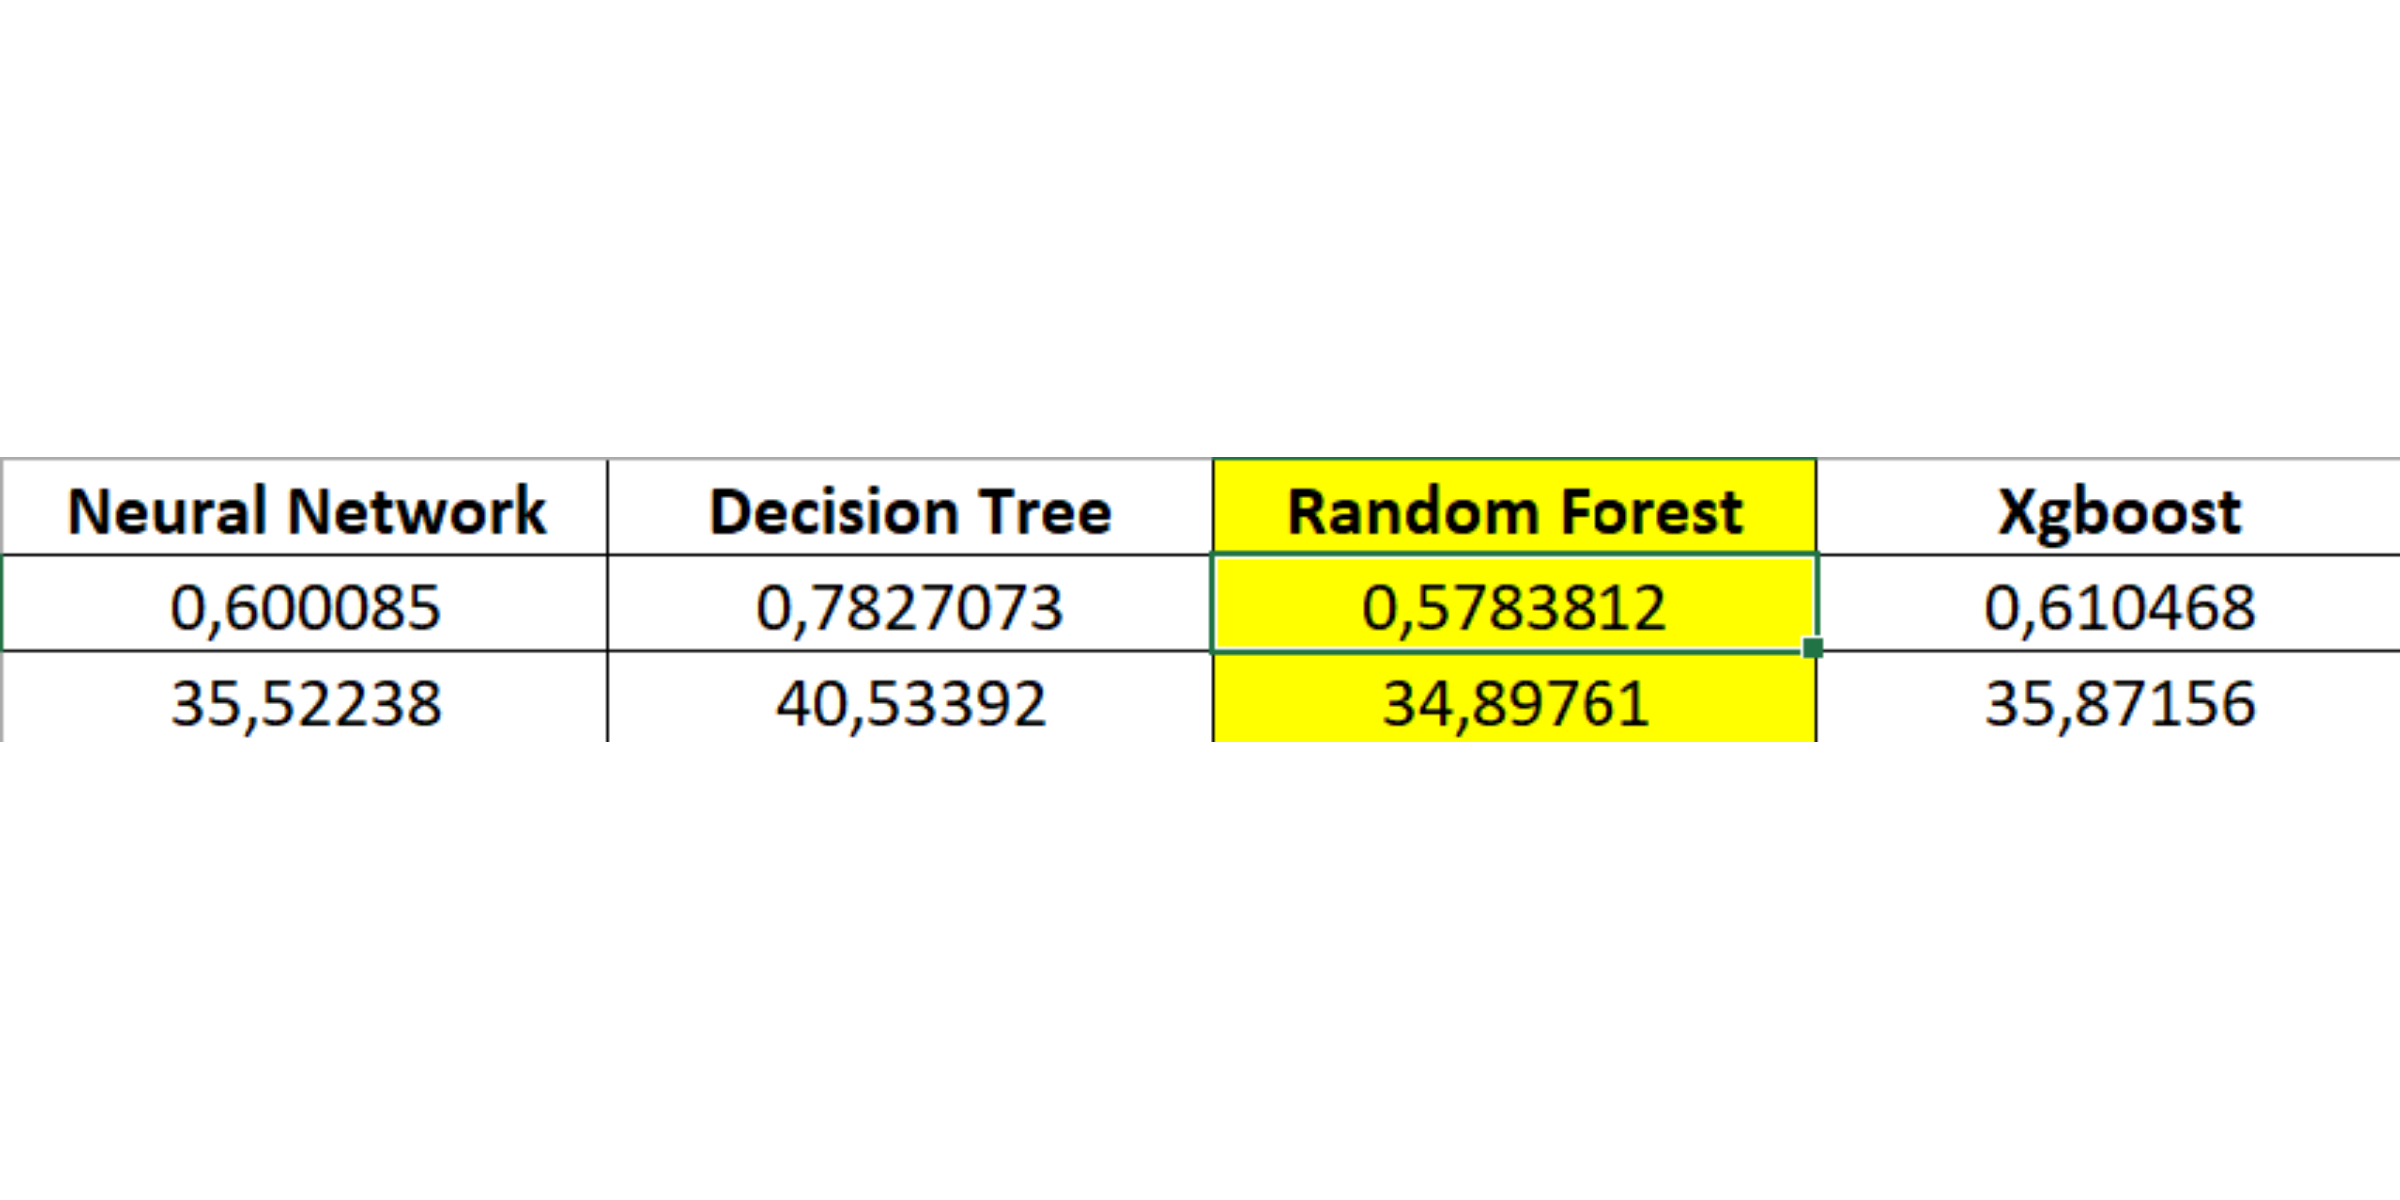

In [25]:
library(png)
library(grid)
img <- readPNG("perf.png")
grid.raster(img)


We will use the model obtained by our cross validation fonction when we used random forestt, because its the model performing better to our data.

# Question 4

Let's use our best model (The one which minimizes the Averages of errors of each folds, which is random forest) in order to make our predictions on the target.


The correct submission file is the one computed with random forest, named "SampleSubmission_RandomForest_Final.csv"

# Predictions with our best model submitted on Zindi (random forest model)

For the question 4, we submitted on Zindi platform the predictions computed with our random forest model, but in this notebook, we chose to compute it with our boosting model (xgb library) due to its fast computation time (80 minutes for random forest vs 30 seconds for xgBoost), although we also generated in this repository the prediction computed with random Forest also.

In [90]:
set.seed(123)
ntrees <- 20  # Number of trees is set to 20 as computed before
p <- ncol(X_train_selected)  # Number of predictor variables
mtry <- if(is.null(mtry)) sqrt(p) else mtry  # Set mtry to default if NULL

# Perform cross-validation and train the final model
result <- perform_cv(X_train_selected, Y_train, randomForest, "response", ntree = ntrees, mtry = mtry)
final_model <- result$model

# Ensure all columns in test data are numeric
test_data <- X_test_selected
test_data[] <- lapply(test_data, function(x) if(is.logical(x)) as.numeric(x) else x)

train_cols <- colnames(X_train_selected)
test_cols <- colnames(test_data)

select_cols <- train_cols
# Make predictions on the test data set using the final model
test_preds <- predict(final_model, test_data[, select_cols, drop = FALSE])

# Load the sample submission file, update it with predictions, and save the updated file
submissions <- read.csv("SampleSubmission.csv")
submissions$target <- test_preds
write.csv(submissions, file = "SampleSubmission_RandomForest_Final.csv", row.names = FALSE)


Mean of errors to evaluate the performance of the model :
Average of RMSE:  34.87143 
Average of NMSE:  0.5770854 


# Prediction with our xgboost model

Let's use our model returned by the 'perform_cv' function

In [91]:
set.seed(123)
# Assuming the final_model is obtained from the cross-validation function
final_model <- perform_cv_xgboost(X_train_selected, Y_train, params, nrounds)

# Ensure all columns in test data are numeric
test_data <- X_test_selected
test_data[] <- lapply(test_data, function(x) if(is.logical(x)) as.numeric(x) else x)

# Check if column names in test_data match those in train_data (excluding target column)
train_cols <- colnames(X_train_selected)
test_cols <- colnames(test_data)
select_cols <- train_cols

# Convert the test data for selected columns into a format suitable for XGBoost prediction
test_xgb_data <- xgb.DMatrix(data = as.matrix(test_data[, select_cols, drop = FALSE]))

# Make predictions on the test data set using the final model
test_preds <- predict(final_model, test_xgb_data)

# Load the sample submission file, update it with predictions, and save the updated file
submissions <- read.csv("SampleSubmission.csv")
submissions$target <- test_preds
write.csv(submissions, file = "SampleSubmission_xgBoost.csv", row.names = FALSE)


Mean of errors to evaluate the performance of the model :
Average of RMSE:  35.92796 
Average of NMSE:  0.6125941 


The same was made for random forest, and it was the one with the highest score in Zindi platform (36 for random forest, and 38 for xgboost) So we conclude that despite its slowest computation, randomforest performs better than the boosting method.
The Excel files for both algorithm (xgboost and randomforest) were generated and "SampleSubmission_RF" corresponds to the predictions of the random forest (our best model), and "SampleSubmission_xgBoost" corresponds to the predictions of our model implemented with the boosting method.

# Question 5: Ranking Features by Predictive Power

Using the regression model selected in the previous steps (Here we will use the xgboost for its fast computationnal time), the code below returns a ranking of the features in terms of predictive power. The predictive power of the ith feature is computed as the conditional information of Xi about the target Y, given the set of all other features (X_i)

I(x 
i
​
 ;y∣X 
−i
​
 )=H(y∣X 
−i
​
 )−H(y∣X)

To do this, we will :

1 - Identify the top 10 most relevant features from our dataset, based on the feature selection and modeling procedures already implemented.

2 - We will use the concept of conditional entropy to compute the predictive power of each feature.

In [52]:
library(rpart)
library(randomForest)
library(caret)
library(dplyr)

# Top 10 feature selection
set.seed(123)
X_top_features <- X_train_selected[, 1:10]
top_feature_names <- names(X_top_features)

# Step 1: Train the model on the full feature set and get the cross-validation error, which will be used to approximate our conditionnal entropy

results_full <- perform_cv(X_top_features, Y_train, randomForest, pred_type="response", ntree = 20, mtry = sqrt(ncol(X_top_features)))
H_y_X <- results_full$RMSE

# Step 2: Initialize a vector to store the cross-validation errors for each subset

cv_errors <- numeric(ncol(X_top_features))

# Here, we calculate the cross-validation error for each subset, where each subset is the original set of features minus one specific feature.
# We will thus perform a loop because we will iterate over each feature to exclude it and compute the error.

for (i in 1:ncol(X_top_features)) {
    X_minus_i <- X_top_features[, -i, drop = FALSE] # Ensure the subset is still a data frame
    results_minus_i <- perform_cv(X_minus_i, Y_train, randomForest, pred_type="response", ntree = 20, mtry = sqrt(ncol(X_minus_i)))
    cv_errors[i] <- results_minus_i$RMSE
}

# Calculate the conditional information for each feature
conditional_information <- cv_errors - H_y_X

# Rank the features based on the conditional information
ranked_features <- data.frame(
  Feature = colnames(X_top_features),
  Conditional_Information = conditional_information
)

ranked_features <- ranked_features[order(ranked_features$Conditional_Information, decreasing = TRUE), ]



Mean of errors to evaluate the performance of the model :
Average of RMSE:  36.27871 
Average of NMSE:  0.6247278 

Mean of errors to evaluate the performance of the model :
Average of RMSE:  37.63957 
Average of NMSE:  0.6740475 

Mean of errors to evaluate the performance of the model :
Average of RMSE:  37.68552 
Average of NMSE:  0.6753428 

Mean of errors to evaluate the performance of the model :
Average of RMSE:  37.13835 
Average of NMSE:  0.6540627 

Mean of errors to evaluate the performance of the model :
Average of RMSE:  38.08797 
Average of NMSE:  0.6881842 

Mean of errors to evaluate the performance of the model :
Average of RMSE:  36.50782 
Average of NMSE:  0.6329134 

Mean of errors to evaluate the performance of the model :
Average of RMSE:  37.1562 
Average of NMSE:  0.655745 

Mean of errors to evaluate the performance of the model :
Average of RMSE:  36.57871 
Average of NMSE:  0.6348315 

Mean of errors to evaluate the performance of the model :
Average of RMSE

In [54]:
# Display the ranked features
print(ranked_features)

                                           Feature Conditional_Information
4                        L3_AER_AI_sensor_altitude              1.80925159
2           L3_NO2_NO2_slant_column_number_density              1.40680758
1                   L3_CO_CO_column_number_density              1.36085465
6             u_component_of_wind_10m_above_ground              0.87748344
3  L3_HCHO_tropospheric_HCHO_column_number_density              0.85963480
9                      L3_CLOUD_cloud_top_pressure              0.37039422
7                     L3_CLOUD_cloud_optical_depth              0.30000098
5                   L3_SO2_absorbing_aerosol_index              0.22911107
10                    L3_CH4_aerosol_optical_depth              0.10045174
8                 L3_SO2_SO2_column_number_density             -0.06441616


This feature has the highest positive conditional information, suggesting it is the most important feature for your model. 

Removing it will result in a significant increase in the RMSE, indicating it provides critical information for predicting the target variable.

# Let's compare the columns obtained by this method of feature selection with the 10 first columns wich resulted of our feature selection in part 1 : 

In [75]:
mrmr_selected_features <- colnames(X_train)[selected_mRmR[1:10]]
model_based_features <- ranked_features$Feature
mrmr_selected_features


[1] "L3_CO_CO_column_number_density"                 
 [2] "L3_NO2_NO2_slant_column_number_density"         
 [3] "L3_HCHO_tropospheric_HCHO_column_number_density"
 [4] "L3_AER_AI_sensor_altitude"                      
 [5] "L3_SO2_absorbing_aerosol_index"                 
 [6] "u_component_of_wind_10m_above_ground"           
 [7] "L3_CLOUD_cloud_optical_depth"                   
 [8] "L3_SO2_SO2_column_number_density"               
 [9] "L3_CLOUD_cloud_top_pressure"                    
[10] "L3_CH4_aerosol_optical_depth"

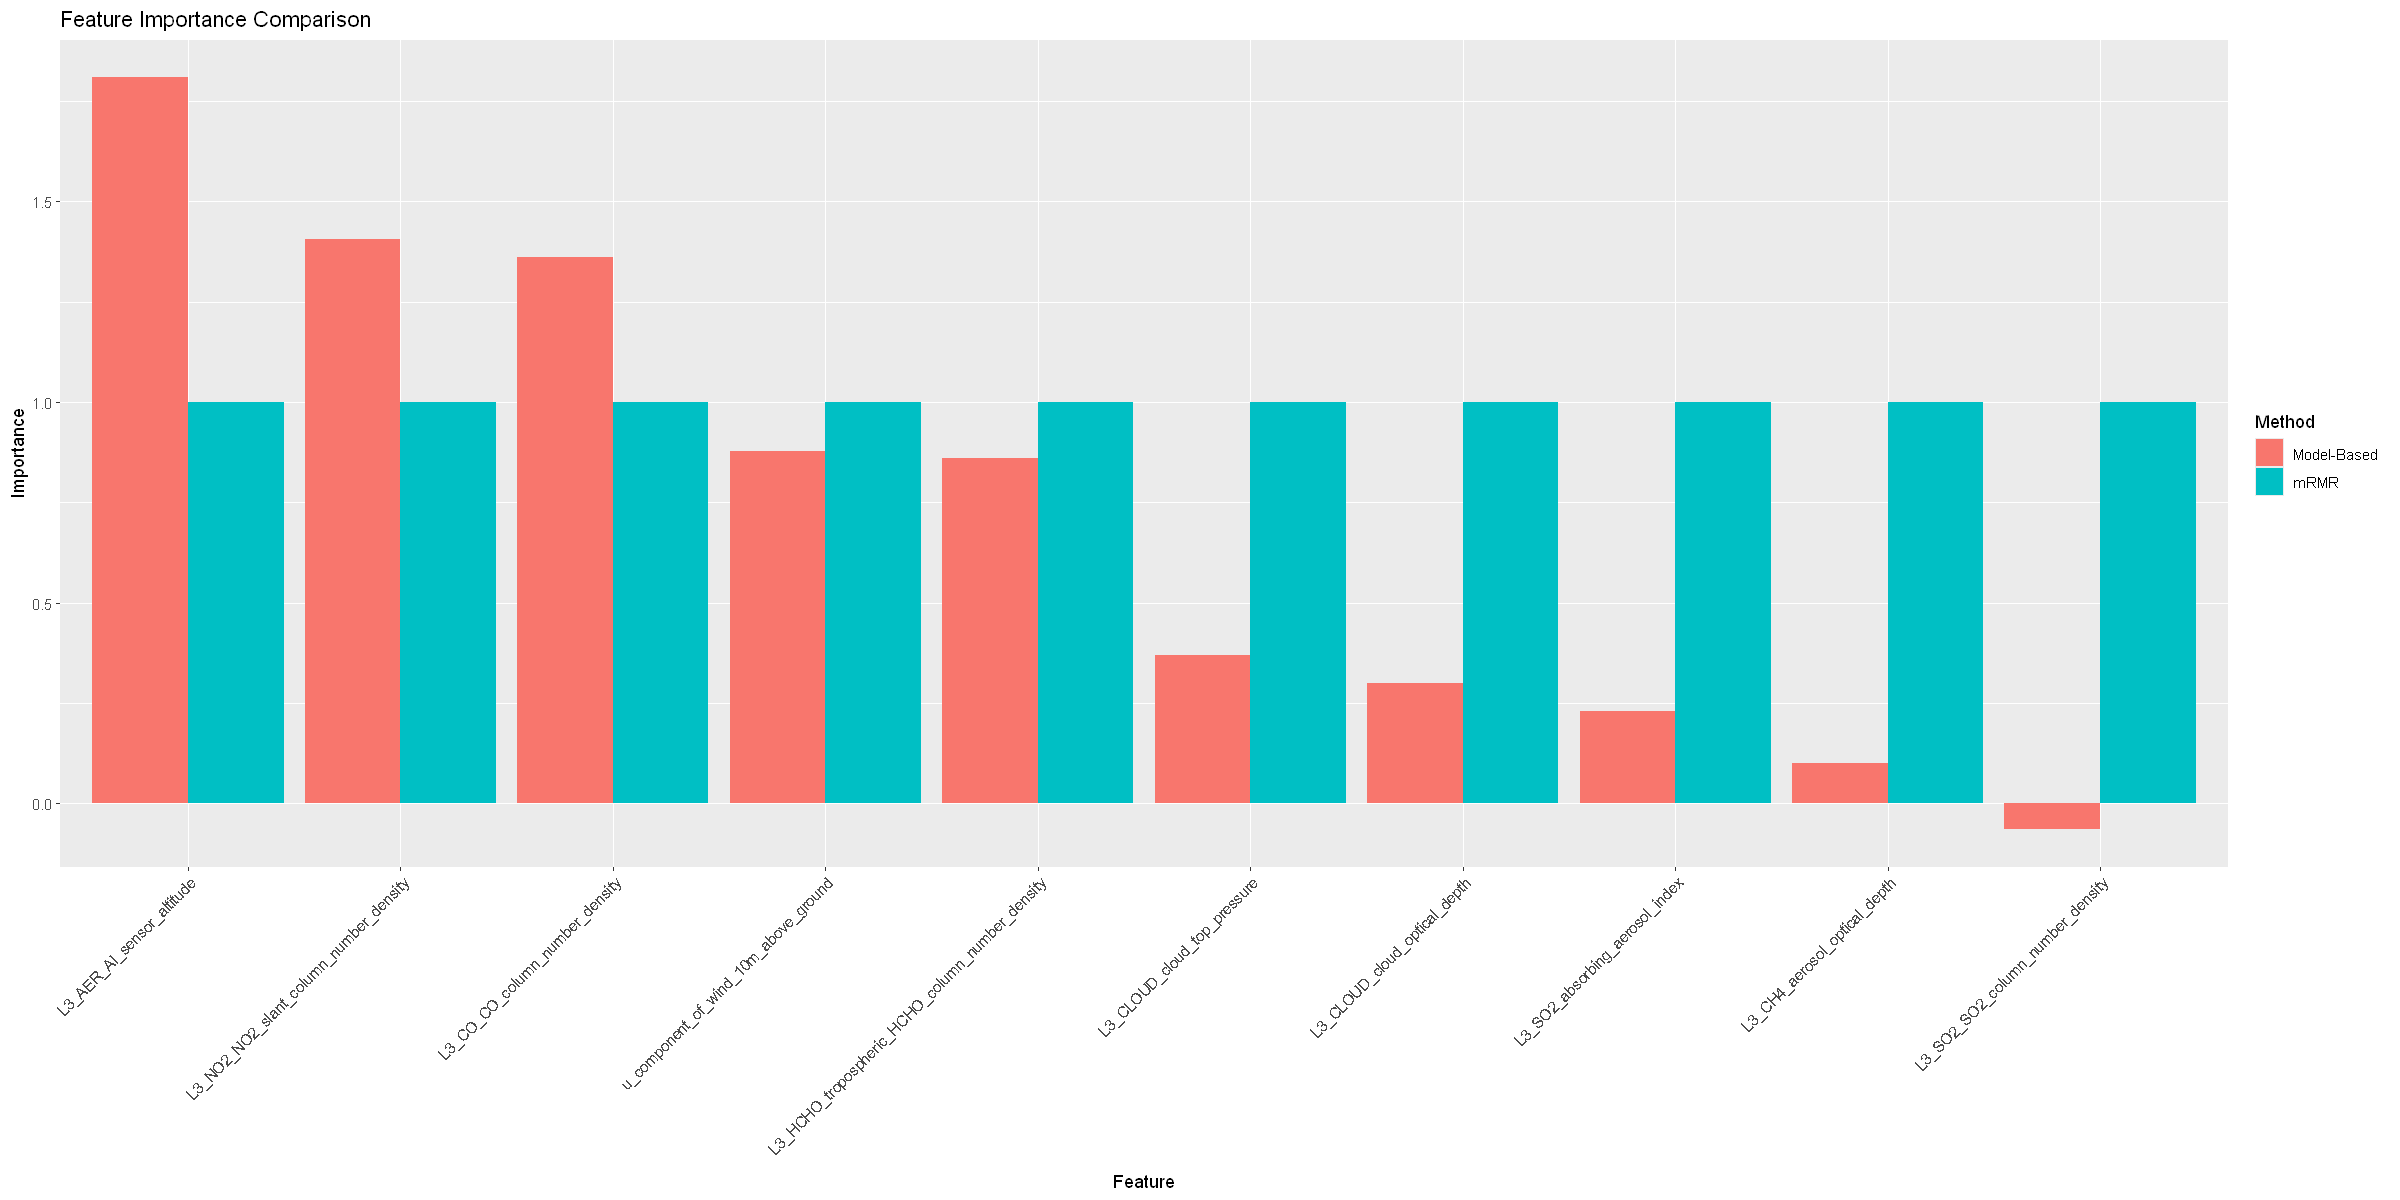

In [78]:
library(ggplot2)

importance_df <- data.frame(
  Feature = c(mrmr_selected_features, model_based_features),
  Importance = c(rep(1, length(mrmr_selected_features)), ranked_features$Conditional_Information),
  Method = c(rep("mRMR", length(mrmr_selected_features)), rep("Model-Based", length(model_based_features)))
)

# Bar plot for mRMR and Model-Based features with importance values

ggplot(importance_df, aes(x = reorder(Feature, -Importance), y = Importance, fill = Method)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Feature Importance Comparison", x = "Feature", y = "Importance") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

The fundamental difference in selection criteria can explain why some features are chosen by mRMR but not by the model-based method, and vice versa. mRMR focuses on statistical relevance and minimizing redundancy, ensuring that selected features are individually important to the target variable and not highly correlated with each other. In contrast, the model-based method emphasizes the immediate impact on predictive performance, evaluating the importance of each feature based on how much it reduces prediction error when included in the model.

A hybrid approach could combine the strengths of both methods. For example, one could start with an initial selection of features using mRMR to reduce redundancy and ensure a diverse set of relevant features. This selection could then be refined using the model-based evaluation to maximize predictive performance by focusing on features that have the most significant impact on reducing prediction error.


# Bibliography : 

https://gijopeter.medium.com/cross-validation-for-ml-feature-selection-ffdb71e5a68f 